In [132]:
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [143]:
def fuzzy_c_means(image, clusters, ms, eps, iteration):
    labels = [None for _ in range(len(clusters))]

    for idx, (cluster, m) in enumerate(zip(clusters, ms)):
        print(f"CLUSTER : {cluster}")
        print(f"m       : {m}")
        start_time = time.time()

        # initialisation de U
        U = np.random.rand(image.size, cluster)
        U = U / np.sum(U, axis=1).reshape(-1, 1)

        # flatten image
        x = image.flatten().astype('float')

        # train
        for iter in range(iteration):
            # calcul de C
            C = np.dot(x, U**m) / np.sum(U**m, axis=0)

            # copy U
            U_prev = np.copy(U)

            # mise à jour de U
            mc, mx = np.meshgrid(C, x)
            numer = abs(mx - mc)**(2. / (m-1))
            denom = np.sum((1 / abs(mx - mc))**(2 / (m-1)), axis=1)
            U = 1 / (numer * denom[:,None])

            # calcul de norm
            norm = np.sum(abs(U - U_prev))
            print(f"[ITER {iter}] norm = {norm}")

            # vérification
            if norm < eps:
                break

        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Temps pris : {elapsed_time:.4f} secondes")

        # label save
        label = np.argmax(U, axis=1)
        label = label.reshape(image.shape).astype('int')
        labels[idx] = label

    return labels

# 1er image

In [144]:
imgpath = "/content/milky-way.jpg"
image = cv2.imread(imgpath, cv2.IMREAD_GRAYSCALE)

cluster = [2, 3, 4, 5]
m = [1.5, 2.0, 2.0, 2.0]
eps = 1e-4
iteration = 500

In [145]:
labels = fuzzy_c_means(image, cluster, m, eps, iteration)

CLUSTER : 2
m       : 1.5
[ITER 0] norm = 405704.5780028179
[ITER 1] norm = 41386.57418862783
[ITER 2] norm = 162716.2801668791
[ITER 3] norm = 481575.2935902613
[ITER 4] norm = 382941.236689578
[ITER 5] norm = 69984.12743253018
[ITER 6] norm = 28205.20957178046
[ITER 7] norm = 13111.160731000395
[ITER 8] norm = 6129.5506904528565
[ITER 9] norm = 2881.8240278248204
[ITER 10] norm = 1358.9323937480287
[ITER 11] norm = 641.7227930826051
[ITER 12] norm = 303.2424104673362
[ITER 13] norm = 143.34110212485217
[ITER 14] norm = 67.76679338746592
[ITER 15] norm = 32.04011000175135
[ITER 16] norm = 15.149062847954657
[ITER 17] norm = 7.162822851424935
[ITER 18] norm = 3.386770045020126
[ITER 19] norm = 1.6013630479141945
[ITER 20] norm = 0.7571687250118114
[ITER 21] norm = 0.358015394878441
[ITER 22] norm = 0.16928062670358543
[ITER 23] norm = 0.08003909824181987
[ITER 24] norm = 0.03784389183366629
[ITER 25] norm = 0.017894773492283945
[ITER 26] norm = 0.008461475435073681
[ITER 27] norm = 0.0

In [146]:
import matplotlib.image as mpimg
def visualize(image, imgpath, labels):
    num_rows = 4
    num_cols = 2
    if image.shape[0] == 1024:
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 24))
    else:
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 16))
    for i in range(num_rows):
        for j in range(num_cols):
            if j%2==0:
                image_ = mpimg.imread(imgpath)
                axes[i, j].imshow(image_)
                axes[i, j].set_title('original')
            else:
                axes[i, j].imshow(labels[i])
                axes[i, j].set_title('segmented')
    plt.show()

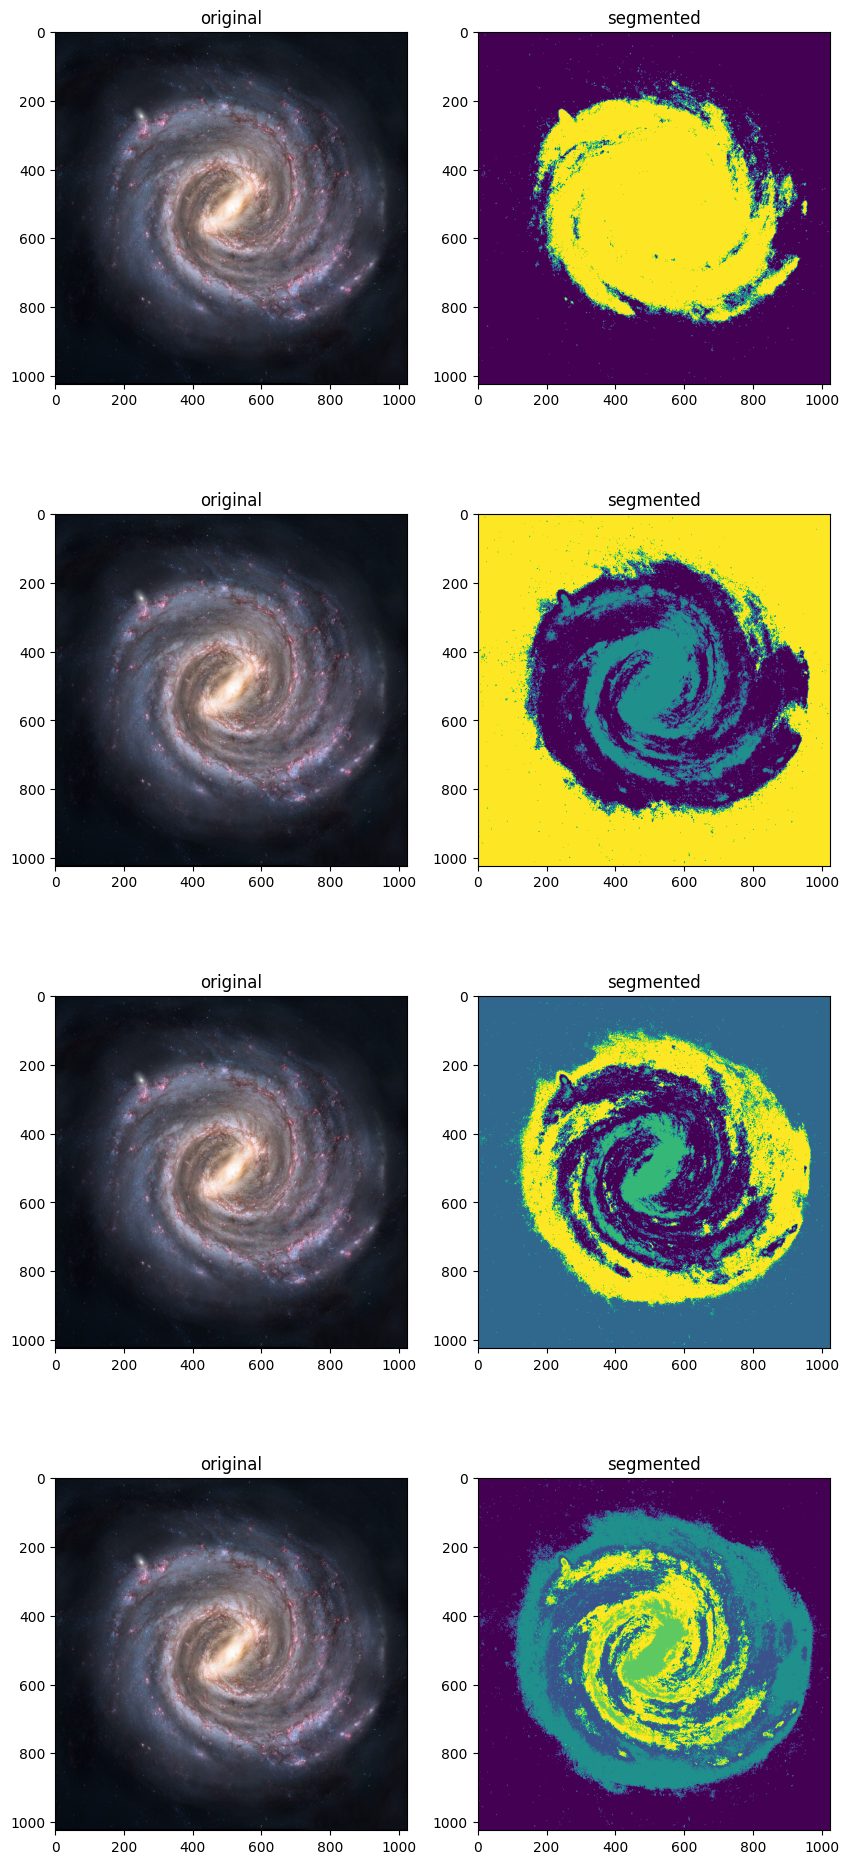

In [147]:
visualize(image, imgpath, labels)

# 2ème image

In [119]:
imgpath = "/content/Yellow_lemons.jpg"
image = cv2.imread(imgpath, cv2.IMREAD_GRAYSCALE)

cluster = [2, 3, 4, 5]
m = [1.5, 2.0, 2.0, 2.0]
eps = 1e-4
iteration = 500

In [114]:
labels = fuzzy_c_means(image, cluster, m, eps, iteration)

CLUSTER : 2
m       : 1.5
[ITER 0] norm = 1360065.3058264186
[ITER 1] norm = 57678.24940818203
[ITER 2] norm = 310004.0746572676
[ITER 3] norm = 1186428.3538016106
[ITER 4] norm = 1634920.4236731587
[ITER 5] norm = 618561.8553410736
[ITER 6] norm = 134776.5124298334
[ITER 7] norm = 42299.87721001516
[ITER 8] norm = 12327.127312413886
[ITER 9] norm = 3487.523358739627
[ITER 10] norm = 978.6077089613475
[ITER 11] norm = 273.97001608368686
[ITER 12] norm = 76.65104373895595
[ITER 13] norm = 21.441536024523163
[ITER 14] norm = 5.997456284728907
[ITER 15] norm = 1.6775413877915293
[ITER 16] norm = 0.4692466386371041
[ITER 17] norm = 0.13129589817858028
[ITER 18] norm = 0.03662769671745213
[ITER 19] norm = 0.010301634291890056
[ITER 20] norm = 0.0028901535425140137
[ITER 21] norm = 0.0007634584331558556
[ITER 22] norm = 0.0002418519781808608
[ITER 23] norm = 5.710980261978365e-05
Temps pris : 33.7484 secondes
CLUSTER : 3
m       : 2.0
[ITER 0] norm = 1519754.862777531
[ITER 1] norm = 25344.5

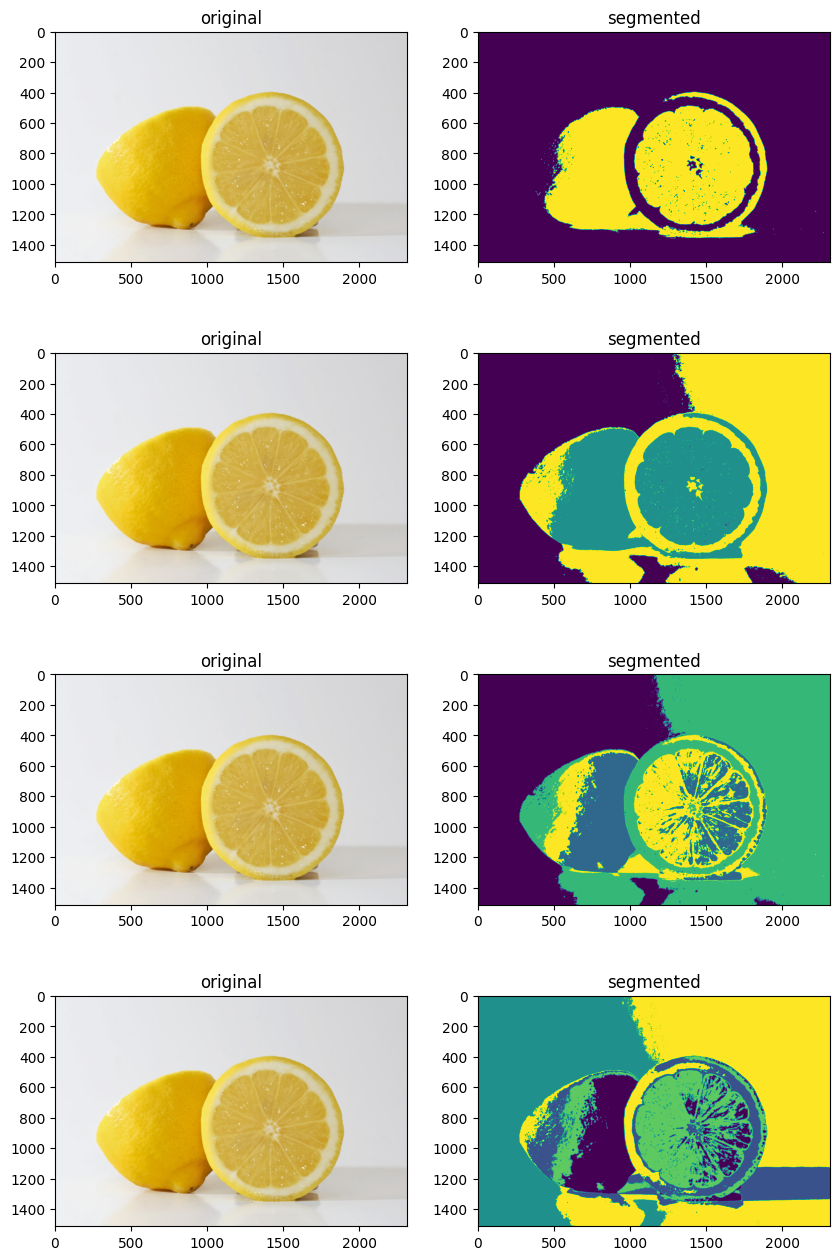

In [131]:
visualize(image, imgpath, labels)